In [1]:
import shutil

# Copy data.yaml from correct path
shutil.copy('/kaggle/input/yaml-file/data.yaml', '/kaggle/working/data.yaml')


'/kaggle/working/data.yaml'

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 8.8 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing ins

In [6]:
!ls /kaggle/input
!ls /kaggle/input/kitti-yolo

kitti-yolo  yaml-file
Dataset


In [4]:
yaml_content = """
train: /kaggle/input/kitti-yolo/Dataset/train/images
val: /kaggle/input/kitti-yolo/Dataset/val/images

nc: 8
names:
  - Car
  - Van
  - Truck
  - Pedestrian
  - Person_sitting
  - Cyclist
  - Tram
  - Misc
"""

with open("/kaggle/working/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml file saved to /kaggle/working/data.yaml")


✅ data.yaml file saved to /kaggle/working/data.yaml


In [5]:
!unzip -q /kaggle/input/kitti-yolo/kitti-yolo.zip -d /kaggle/working

unzip:  cannot find or open /kaggle/input/kitti-yolo/kitti-yolo.zip, /kaggle/input/kitti-yolo/kitti-yolo.zip.zip or /kaggle/input/kitti-yolo/kitti-yolo.zip.ZIP.


In [5]:
!ls /kaggle/working/runs/detect/kitti_yolo8/weights


ls: cannot access '/kaggle/working/runs/detect/kitti_yolo8/weights': No such file or directory


In [14]:
import os
from ultralytics import YOLO

# Model type
MODEL_TYPE = "yolov8n.pt"

# ✅ Use correct data.yaml path inside Kaggle environment
DATA_YAML_PATH = "/kaggle/working/data.yaml"

# Training configuration
EPOCHS = 100
IMG_SIZE = 640
BATCH_SIZE = 16
EXPERIMENT_NAME = "kitti_yolo8"
SAVE_DIR = f"runs/detect/{EXPERIMENT_NAME}"

# Load the model
model = YOLO(MODEL_TYPE)

print("🚀 Starting training...")
model.train(
    data=DATA_YAML_PATH,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    name=EXPERIMENT_NAME
)
print("✅ Training complete.")

print("📊 Evaluating the model on validation set...")
metrics = model.val()

print("\n📈 Evaluation Metrics:")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.precision:.4f}")
print(f"Recall: {metrics.box.recall:.4f}")

print("\n🔍 Running inference on validation images...")

# ✅ Update source path to match your Kaggle dataset folder
inference_output = model.predict(
    source="/kaggle/input/kitti-yolo/train/images",  # same as training data
    save=True,
    name="inference_results",
    conf=0.25
)

print("\n✅ Inference complete. Results saved to: runs/detect/inference_results/")
print("\n🎉 All steps completed successfully!")


🚀 Starting training...
Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=kitti_yolo84, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

train: Scanning /kaggle/input/kitti-yolo/Dataset/train/labels... 7001 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7001/7001 [00:18<00:00, 383.25it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/kitti-yolo/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 700.4±362.7 MB/s, size: 798.1 KB)


val: Scanning /kaggle/input/kitti-yolo/Dataset/val/labels... 480 images, 0 backgrounds, 0 corrupt: 100%|██████████| 480/480 [00:01<00:00, 374.90it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/kitti-yolo/Dataset/val is not writeable, cache not saved.


Plotting labels to runs/detect/kitti_yolo84/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/kitti_yolo84
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.24G      1.406      1.941      1.111        126        640: 100%|██████████| 438/438 [01:29<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]


                   all        480       2476      0.485      0.328      0.301      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.24G      1.301      1.296      1.073         77        640: 100%|██████████| 438/438 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


                   all        480       2476      0.518      0.375      0.378      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.24G      1.306      1.214      1.081         71        640: 100%|██████████| 438/438 [01:25<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.18it/s]


                   all        480       2476      0.529       0.41      0.445      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.24G      1.292      1.126      1.081        100        640: 100%|██████████| 438/438 [01:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.41it/s]


                   all        480       2476      0.537        0.5      0.496      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.25G      1.241      1.019      1.066        130        640: 100%|██████████| 438/438 [01:25<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.65it/s]

                   all        480       2476      0.612      0.509      0.548      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.25G      1.198     0.9383       1.05         85        640: 100%|██████████| 438/438 [01:24<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.47it/s]


                   all        480       2476      0.741      0.493       0.58       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.25G      1.171     0.8914      1.038         98        640: 100%|██████████| 438/438 [01:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.36it/s]

                   all        480       2476      0.713      0.516      0.593      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.25G      1.151     0.8607      1.033         70        640: 100%|██████████| 438/438 [01:26<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


                   all        480       2476      0.661      0.607      0.637      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.25G      1.131     0.8299      1.027         85        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.55it/s]


                   all        480       2476      0.667      0.586      0.641      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.25G      1.111     0.8032      1.018        152        640: 100%|██████████| 438/438 [01:24<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.37it/s]


                   all        480       2476      0.707      0.589      0.641       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.25G      1.095     0.7837      1.011        122        640: 100%|██████████| 438/438 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.64it/s]

                   all        480       2476      0.729      0.616      0.692      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.25G      1.081     0.7583      1.008         64        640: 100%|██████████| 438/438 [01:24<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]


                   all        480       2476      0.718      0.607      0.689      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.25G      1.064     0.7444     0.9991         91        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.53it/s]

                   all        480       2476      0.718       0.67      0.721      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.25G      1.058     0.7313      0.997        104        640: 100%|██████████| 438/438 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.45it/s]


                   all        480       2476      0.699      0.669      0.717       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.25G       1.05     0.7263     0.9919         92        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.17it/s]


                   all        480       2476       0.76      0.615      0.703      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.25G      1.037     0.7111     0.9878         97        640: 100%|██████████| 438/438 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.66it/s]


                   all        480       2476      0.759      0.675      0.746      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.26G      1.024     0.7015     0.9851         83        640: 100%|██████████| 438/438 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


                   all        480       2476      0.732      0.683      0.748      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.26G      1.017       0.69     0.9808        118        640: 100%|██████████| 438/438 [01:25<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.88it/s]


                   all        480       2476      0.758      0.688      0.753      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.26G      1.009     0.6823     0.9792         98        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.66it/s]


                   all        480       2476      0.765      0.654      0.754      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.26G      1.007     0.6788     0.9761         79        640: 100%|██████████| 438/438 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.36it/s]


                   all        480       2476      0.776      0.729      0.786      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.26G      0.996     0.6654     0.9698         98        640: 100%|██████████| 438/438 [01:24<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.49it/s]


                   all        480       2476      0.812      0.693       0.79      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.26G     0.9887     0.6608      0.968        130        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]

                   all        480       2476      0.815      0.712      0.789      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.26G     0.9767     0.6473     0.9673        131        640: 100%|██████████| 438/438 [01:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.41it/s]


                   all        480       2476      0.826      0.697      0.787      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.26G      0.976     0.6474     0.9637        123        640: 100%|██████████| 438/438 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]


                   all        480       2476      0.783      0.719       0.79      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.26G     0.9701     0.6389      0.961        131        640: 100%|██████████| 438/438 [01:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


                   all        480       2476      0.848      0.667      0.782      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.26G      0.958     0.6328     0.9597         99        640: 100%|██████████| 438/438 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.55it/s]


                   all        480       2476      0.797      0.746      0.809      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.26G     0.9544     0.6265     0.9591        111        640: 100%|██████████| 438/438 [01:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.63it/s]


                   all        480       2476      0.756      0.756      0.804      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.26G     0.9451     0.6213     0.9564        138        640: 100%|██████████| 438/438 [01:24<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


                   all        480       2476      0.806      0.745      0.804      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.26G     0.9447     0.6142     0.9533        112        640: 100%|██████████| 438/438 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.18it/s]


                   all        480       2476      0.788      0.731      0.823      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.26G     0.9395     0.6135     0.9513        103        640: 100%|██████████| 438/438 [01:24<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.62it/s]


                   all        480       2476      0.826      0.728      0.809      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.26G     0.9349     0.6117     0.9484         71        640: 100%|██████████| 438/438 [01:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.56it/s]

                   all        480       2476      0.816      0.722      0.808      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.26G     0.9309     0.6034      0.949        138        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.59it/s]


                   all        480       2476      0.819      0.761      0.819      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.26G      0.927     0.5999     0.9478        146        640: 100%|██████████| 438/438 [01:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.44it/s]

                   all        480       2476      0.814      0.793      0.841      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.26G     0.9227     0.5993     0.9472         93        640: 100%|██████████| 438/438 [01:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.60it/s]


                   all        480       2476      0.763      0.789      0.833      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.26G     0.9141     0.5882     0.9412         65        640: 100%|██████████| 438/438 [01:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.62it/s]


                   all        480       2476      0.841      0.759      0.846      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.26G     0.9087     0.5836     0.9403         87        640: 100%|██████████| 438/438 [01:24<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.50it/s]

                   all        480       2476      0.855       0.78      0.856      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.27G     0.9054     0.5822     0.9394        100        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.55it/s]


                   all        480       2476      0.788       0.79      0.833      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.27G     0.9034       0.58     0.9382        117        640: 100%|██████████| 438/438 [01:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]

                   all        480       2476      0.844      0.741      0.847      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.28G     0.9047     0.5815     0.9395        146        640: 100%|██████████| 438/438 [01:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.50it/s]


                   all        480       2476      0.875      0.789      0.864      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.28G     0.8861     0.5703     0.9336        109        640: 100%|██████████| 438/438 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.82it/s]

                   all        480       2476      0.862      0.766      0.856      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.28G     0.8863     0.5665     0.9342        106        640: 100%|██████████| 438/438 [01:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


                   all        480       2476      0.852      0.825       0.87      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.28G     0.8821     0.5632     0.9315        105        640: 100%|██████████| 438/438 [01:23<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


                   all        480       2476      0.847      0.807      0.873      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.28G     0.8779     0.5592     0.9294        127        640: 100%|██████████| 438/438 [01:24<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


                   all        480       2476      0.886      0.773       0.87      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.28G     0.8729     0.5556     0.9289         99        640: 100%|██████████| 438/438 [01:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


                   all        480       2476      0.869      0.809      0.874      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.28G     0.8718     0.5559     0.9275         93        640: 100%|██████████| 438/438 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.64it/s]


                   all        480       2476      0.832      0.828       0.88      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.28G     0.8689     0.5544     0.9275        110        640: 100%|██████████| 438/438 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.82it/s]

                   all        480       2476      0.867      0.819      0.881      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.28G     0.8647     0.5482     0.9253        138        640: 100%|██████████| 438/438 [01:25<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.57it/s]


                   all        480       2476      0.856      0.821      0.877      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.28G     0.8584     0.5436      0.925        118        640: 100%|██████████| 438/438 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.56it/s]


                   all        480       2476      0.877      0.827      0.887      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.28G     0.8619     0.5457     0.9235         62        640: 100%|██████████| 438/438 [01:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.59it/s]


                   all        480       2476       0.87       0.79      0.877       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.28G     0.8526     0.5396     0.9221        114        640: 100%|██████████| 438/438 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


                   all        480       2476      0.882      0.815      0.877      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.28G     0.8492     0.5378      0.919         73        640: 100%|██████████| 438/438 [01:23<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


                   all        480       2476       0.89      0.828      0.889      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.28G     0.8474     0.5372     0.9197         92        640: 100%|██████████| 438/438 [01:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.60it/s]


                   all        480       2476      0.903      0.814      0.885      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.28G      0.842     0.5326     0.9166         97        640: 100%|██████████| 438/438 [01:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.59it/s]


                   all        480       2476       0.89      0.822      0.891      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.28G     0.8382     0.5293     0.9166         85        640: 100%|██████████| 438/438 [01:23<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.45it/s]


                   all        480       2476      0.911      0.811      0.889      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.28G     0.8359     0.5303     0.9169         75        640: 100%|██████████| 438/438 [01:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.56it/s]


                   all        480       2476        0.9       0.84      0.897      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.28G     0.8305     0.5238      0.912        103        640: 100%|██████████| 438/438 [01:23<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.63it/s]


                   all        480       2476      0.893      0.825      0.886      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.28G     0.8292     0.5207     0.9135         91        640: 100%|██████████| 438/438 [01:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]


                   all        480       2476      0.882      0.843      0.899      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.28G     0.8305     0.5221     0.9139        129        640: 100%|██████████| 438/438 [01:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


                   all        480       2476      0.867      0.836      0.886      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.28G     0.8205     0.5145     0.9099        120        640: 100%|██████████| 438/438 [01:26<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.37it/s]


                   all        480       2476      0.906       0.83      0.897      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.28G     0.8242     0.5162     0.9104         88        640: 100%|██████████| 438/438 [01:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.74it/s]


                   all        480       2476      0.896      0.821      0.898       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.28G     0.8218     0.5172     0.9107         66        640: 100%|██████████| 438/438 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.45it/s]


                   all        480       2476      0.889      0.829      0.904      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.28G     0.8152     0.5098     0.9088         59        640: 100%|██████████| 438/438 [01:26<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.26it/s]


                   all        480       2476      0.869      0.868      0.905      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.28G     0.8088     0.5053     0.9055         64        640: 100%|██████████| 438/438 [01:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.38it/s]


                   all        480       2476       0.87      0.847      0.896      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.28G     0.8041     0.5033     0.9055         77        640: 100%|██████████| 438/438 [01:25<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.17it/s]


                   all        480       2476      0.891      0.823      0.901      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.28G     0.8038      0.505     0.9052        103        640: 100%|██████████| 438/438 [01:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


                   all        480       2476      0.906      0.844      0.903      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.28G     0.8055     0.5032     0.9041        113        640: 100%|██████████| 438/438 [01:25<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


                   all        480       2476      0.892      0.838        0.9      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.28G     0.7996     0.5004      0.904         74        640: 100%|██████████| 438/438 [01:25<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.53it/s]


                   all        480       2476      0.885      0.833      0.903      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G     0.7948     0.4966     0.9021         81        640: 100%|██████████| 438/438 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.54it/s]


                   all        480       2476      0.889      0.845      0.902       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.28G     0.7961     0.4961      0.903         87        640: 100%|██████████| 438/438 [01:24<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]


                   all        480       2476      0.917      0.826      0.901      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.28G     0.7916     0.4937      0.901         69        640: 100%|██████████| 438/438 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.49it/s]

                   all        480       2476       0.93      0.829      0.908      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.28G     0.7838     0.4874     0.9004        114        640: 100%|██████████| 438/438 [01:24<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.65it/s]


                   all        480       2476      0.924       0.84      0.906      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.28G     0.7821     0.4865     0.8971        105        640: 100%|██████████| 438/438 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]

                   all        480       2476      0.914      0.828      0.908      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.28G     0.7778     0.4859     0.8975        115        640: 100%|██████████| 438/438 [01:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.39it/s]


                   all        480       2476      0.903      0.843      0.906      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.28G     0.7744      0.481     0.8982        130        640: 100%|██████████| 438/438 [01:25<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.62it/s]


                   all        480       2476      0.908      0.835      0.908      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.28G     0.7696     0.4788     0.8948        108        640: 100%|██████████| 438/438 [01:24<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.36it/s]


                   all        480       2476      0.899      0.849      0.906      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.28G     0.7648     0.4758     0.8935         87        640: 100%|██████████| 438/438 [01:25<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]


                   all        480       2476      0.888      0.831      0.899      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.28G     0.7695     0.4774     0.8949        123        640: 100%|██████████| 438/438 [01:25<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.53it/s]


                   all        480       2476      0.924      0.807        0.9       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.28G     0.7697     0.4765     0.8933         86        640: 100%|██████████| 438/438 [01:24<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


                   all        480       2476      0.896      0.834        0.9      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.28G       0.76     0.4704     0.8923        127        640: 100%|██████████| 438/438 [01:25<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.45it/s]


                   all        480       2476      0.866      0.849      0.902      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.28G     0.7568     0.4712     0.8926         69        640: 100%|██████████| 438/438 [01:26<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.32it/s]


                   all        480       2476      0.897      0.856      0.913      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.28G     0.7553     0.4676     0.8905         87        640: 100%|██████████| 438/438 [01:26<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]


                   all        480       2476      0.876      0.877      0.911      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.28G     0.7516     0.4673     0.8903        105        640: 100%|██████████| 438/438 [01:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]

                   all        480       2476      0.918       0.85      0.912      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.28G     0.7478     0.4622     0.8868         80        640: 100%|██████████| 438/438 [01:26<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]


                   all        480       2476      0.903      0.855      0.908      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.28G     0.7453     0.4606     0.8861         95        640: 100%|██████████| 438/438 [01:26<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.34it/s]


                   all        480       2476       0.89      0.872       0.91      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.28G     0.7434     0.4619     0.8868        108        640: 100%|██████████| 438/438 [01:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


                   all        480       2476      0.901      0.855      0.908      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G     0.7419     0.4596     0.8874        103        640: 100%|██████████| 438/438 [01:26<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]

                   all        480       2476      0.907      0.854      0.909      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.28G     0.7447     0.4586     0.8869         67        640: 100%|██████████| 438/438 [01:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.39it/s]

                   all        480       2476      0.905      0.865      0.909      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.28G     0.7339     0.4535     0.8818         41        640: 100%|██████████| 438/438 [01:26<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.43it/s]


                   all        480       2476      0.907      0.861      0.907      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.28G      0.728     0.4509      0.882        103        640: 100%|██████████| 438/438 [01:26<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.31it/s]

                   all        480       2476      0.895      0.872      0.906      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.28G     0.7326     0.4522     0.8826         79        640: 100%|██████████| 438/438 [01:26<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.09it/s]

                   all        480       2476      0.884      0.877      0.906      0.678


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.28G     0.7096     0.4285     0.8728         43        640: 100%|██████████| 438/438 [01:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.29it/s]


                   all        480       2476      0.876      0.868      0.907      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.28G     0.6912     0.4158     0.8664         49        640: 100%|██████████| 438/438 [01:25<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.28it/s]


                   all        480       2476      0.872      0.865      0.907      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.28G     0.6851     0.4137     0.8655         41        640: 100%|██████████| 438/438 [01:25<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]


                   all        480       2476      0.864      0.876      0.909      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.28G     0.6819     0.4102     0.8631         67        640: 100%|██████████| 438/438 [01:24<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.30it/s]

                   all        480       2476      0.891      0.847      0.913      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.28G     0.6759     0.4074     0.8633         60        640: 100%|██████████| 438/438 [01:25<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.57it/s]


                   all        480       2476      0.897      0.845       0.91      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.28G     0.6721     0.4054     0.8617         73        640: 100%|██████████| 438/438 [01:25<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.35it/s]


                   all        480       2476      0.898      0.842      0.911      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.28G      0.668     0.4019     0.8588         42        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.68it/s]

                   all        480       2476       0.89      0.859      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.28G     0.6645     0.4004       0.86         58        640: 100%|██████████| 438/438 [01:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.34it/s]

                   all        480       2476       0.89      0.858      0.913      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.28G     0.6594     0.3979     0.8588         37        640: 100%|██████████| 438/438 [01:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.37it/s]


                   all        480       2476      0.894      0.862      0.915      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.28G     0.6566     0.3951     0.8553         47        640: 100%|██████████| 438/438 [01:25<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


                   all        480       2476      0.891      0.867      0.915      0.683

100 epochs completed in 2.451 hours.
Optimizer stripped from runs/detect/kitti_yolo84/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/kitti_yolo84/weights/best.pt, 6.2MB

Validating runs/detect/kitti_yolo84/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        480       2476      0.892      0.867      0.915      0.684
                   Car        420       1825      0.937       0.93      0.971      0.815
                   Van        140        173      0.921      0.945      0.965      0.802
                 Truck         52         57      0.934      0.995      0.983      0.826
            Pedestrian        107        224       0.91      0.723      0.835      0.505
        Person_sitting          7         19      0.785      0.684      0.775      0.484
               Cyclist         60         81      0.861      0.889      0.919      0.665
                  Tram         29         45      0.906      0.933      0.966      0.729
                  Misc         45         52      0.879      0.838      0.903      0.643
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/kitti_yolo84
✅ Training complete.
📊 Evaluating the model on validation set...
Ultralytic

val: Scanning /kaggle/input/kitti-yolo/Dataset/val/labels... 480 images, 0 backgrounds, 0 corrupt: 100%|██████████| 480/480 [00:01<00:00, 366.19it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/kitti-yolo/Dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.75it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        480       2476      0.893      0.866      0.914      0.684
                   Car        420       1825      0.938      0.929      0.971      0.817
                   Van        140        173      0.921      0.944      0.965      0.803
                 Truck         52         57      0.934      0.995      0.983      0.824
            Pedestrian        107        224       0.91       0.72      0.835      0.508
        Person_sitting          7         19       0.79      0.684      0.774      0.476
               Cyclist         60         81      0.862      0.889      0.919      0.664
                  Tram         29         45      0.909      0.933      0.966      0.733
                  Misc         45         52      0.879      0.837      0.902      0.645
Speed: 0.2ms preprocess, 1.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/kitti_yolo842

📈 Evaluation Metrics:
mAP50: 0.9144
mAP50-95: 0.6837


AttributeError: 'Metric' object has no attribute 'precision'. See valid attributes below.

    Class for computing evaluation metrics for Ultralytics YOLO models.

    Attributes:
        p (list): Precision for each class. Shape: (nc,).
        r (list): Recall for each class. Shape: (nc,).
        f1 (list): F1 score for each class. Shape: (nc,).
        all_ap (list): AP scores for all classes and all IoU thresholds. Shape: (nc, 10).
        ap_class_index (list): Index of class for each AP score. Shape: (nc,).
        nc (int): Number of classes.

    Methods:
        ap50(): AP at IoU threshold of 0.5 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        ap(): AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: List of AP scores. Shape: (nc,) or [].
        mp(): Mean precision of all classes. Returns: Float.
        mr(): Mean recall of all classes. Returns: Float.
        map50(): Mean AP at IoU threshold of 0.5 for all classes. Returns: Float.
        map75(): Mean AP at IoU threshold of 0.75 for all classes. Returns: Float.
        map(): Mean AP at IoU thresholds from 0.5 to 0.95 for all classes. Returns: Float.
        mean_results(): Mean of results, returns mp, mr, map50, map.
        class_result(i): Class-aware result, returns p[i], r[i], ap50[i], ap[i].
        maps(): mAP of each class. Returns: Array of mAP scores, shape: (nc,).
        fitness(): Model fitness as a weighted combination of metrics. Returns: Float.
        update(results): Update metric attributes with new evaluation results.
    

In [5]:
from ultralytics import YOLO
import pandas as pd

# Load your model
model = YOLO("/kaggle/input/kitti-yolo-model/best.pt")

# ✅ Provide explicit data.yaml
metrics = model.val(data="/kaggle/working/data.yaml")

# Extract per-class metrics
results = metrics.class_result  # list of [P, R, mAP50, mAP50-95]

# Get class names
class_names = model.names

# Prepare data for DataFrame
data = []
for i, r in enumerate(results):
    p = r[0]
    r_ = r[1]
    mAP50 = r[2]
    mAP5095 = r[3]
    f1 = 2 * (p * r_) / (p + r_ + 1e-6)
    acc_est = (p + r_) / 2

    data.append({
        "Class": class_names[i],
        "Precision": round(p, 4),
        "Recall": round(r_, 4),
        "F1 Score": round(f1, 4),
        "Estimated Acc": round(acc_est, 4),
        "mAP50": round(mAP50, 4),
        "mAP50-95": round(mAP5095, 4)
    })

df = pd.DataFrame(data)
print(df.to_string(index=False))


Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 37.2MB/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 82.7±36.1 MB/s, size: 835.4 KB)


val: Scanning /kaggle/input/kitti-yolo/Dataset/val/labels... 480 images, 0 backgrounds, 0 corrupt: 100%|██████████| 480/480 [00:02<00:00, 161.95it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/kitti-yolo/Dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  6.29it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        480       2476      0.893      0.866      0.914      0.684
                   Car        420       1825      0.938      0.929      0.971      0.817
                   Van        140        173      0.921      0.944      0.965      0.803
                 Truck         52         57      0.934      0.995      0.983      0.824
            Pedestrian        107        224       0.91       0.72      0.835      0.508
        Person_sitting          7         19       0.79      0.684      0.774      0.476
               Cyclist         60         81      0.862      0.889      0.919      0.664
                  Tram         29         45      0.909      0.933      0.966      0.733
                  Misc         45         52      0.879      0.837      0.902      0.645
Speed: 0.3ms preprocess, 1.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val3


TypeError: 'method' object is not iterable

In [11]:
import pandas as pd

# Validate again if needed
metrics = model.val(data="/kaggle/working/data.yaml")

class_names = metrics.names

# Per-class arrays
precision_per_class = metrics.box.p
recall_per_class = metrics.box.r
map50_per_class = metrics.box.ap50
map_per_class = metrics.box.ap

data = []
for i, name in enumerate(class_names):
    p = precision_per_class[i]
    r = recall_per_class[i]
    ap50 = map50_per_class[i]
    ap = map_per_class[i]
    f1 = 2 * (p * r) / (p + r + 1e-6)  # avoid divide by zero

    data.append({
        "Class": name,
        "Precision": round(p, 3),
        "Recall": round(r, 3),
        "mAP50": round(ap50, 3),
        "mAP50-95": round(ap, 3),
        "F1 Score": round(f1, 3)
    })

# Use attribute values directly
overall_p = metrics.box.mp
overall_r = metrics.box.mr
overall_ap50 = metrics.box.map50
overall_ap = metrics.box.map
overall_f1 = 2 * (overall_p * overall_r) / (overall_p + overall_r + 1e-6)

# Append overall row
data.append({
    "Class": "all",
    "Precision": round(overall_p, 3),
    "Recall": round(overall_r, 3),
    "mAP50": round(overall_ap50, 3),
    "mAP50-95": round(overall_ap, 3),
    "F1 Score": round(overall_f1, 3)
})

# Create DataFrame
df = pd.DataFrame(data)

# Display
print(df)


Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1114.1±147.5 MB/s, size: 848.5 KB)


val: Scanning /kaggle/input/kitti-yolo/Dataset/val/labels... 480 images, 0 backgrounds, 0 corrupt: 100%|██████████| 480/480 [00:01<00:00, 387.21it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/kitti-yolo/Dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:04<00:00,  7.24it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        480       2476      0.893      0.866      0.914      0.684
                   Car        420       1825      0.938      0.929      0.971      0.817
                   Van        140        173      0.921      0.944      0.965      0.803
                 Truck         52         57      0.934      0.995      0.983      0.824
            Pedestrian        107        224       0.91       0.72      0.835      0.508
        Person_sitting          7         19       0.79      0.684      0.774      0.476
               Cyclist         60         81      0.862      0.889      0.919      0.664
                  Tram         29         45      0.909      0.933      0.966      0.733
                  Misc         45         52      0.879      0.837      0.902      0.645
Speed: 0.5ms preprocess, 1.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val8
  Class  Precision  Recall  mAP50  mAP50-95  F1 Score
0     0      0.938   0.929  0

In [12]:
import pandas as pd

# Validate again if needed
metrics = model.val(data="/kaggle/working/data.yaml")

# Get overall metrics directly as attributes
overall_p = metrics.box.mp
overall_r = metrics.box.mr
overall_ap50 = metrics.box.map50
overall_ap = metrics.box.map
overall_f1 = 2 * (overall_p * overall_r) / (overall_p + overall_r + 1e-6)  # avoid zero division

# Create data dictionary
summary_data = {
    "Precision": [round(overall_p, 3)],
    "Recall": [round(overall_r, 3)],
    "mAP50": [round(overall_ap50, 3)],
    "mAP50-95": [round(overall_ap, 3)],
    "F1 Score": [round(overall_f1, 3)]
}

# Create DataFrame
df_summary = pd.DataFrame(summary_data, index=["Overall"])

# Display
print(df_summary)


Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1091.0±243.0 MB/s, size: 830.3 KB)


val: Scanning /kaggle/input/kitti-yolo/Dataset/val/labels... 480 images, 0 backgrounds, 0 corrupt: 100%|██████████| 480/480 [00:01<00:00, 399.78it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/kitti-yolo/Dataset/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:03<00:00,  7.65it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        480       2476      0.893      0.866      0.914      0.684
                   Car        420       1825      0.938      0.929      0.971      0.817
                   Van        140        173      0.921      0.944      0.965      0.803
                 Truck         52         57      0.934      0.995      0.983      0.824
            Pedestrian        107        224       0.91       0.72      0.835      0.508
        Person_sitting          7         19       0.79      0.684      0.774      0.476
               Cyclist         60         81      0.862      0.889      0.919      0.664
                  Tram         29         45      0.909      0.933      0.966      0.733
                  Misc         45         52      0.879      0.837      0.902      0.645
Speed: 0.5ms preprocess, 1.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val9
         Precision  Recall  mAP50  mAP50-95  F1 Score
Overall      0.893   0.866  0

In [7]:
print(results_dict.keys())


dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])


In [15]:
from IPython.display import FileLink
FileLink(r'runs/detect/kitti_yolo84/weights/best.pt')


/kaggle/working/runs/detect/kitti_yolo84/weights/best.pt

In [2]:
from ultralytics import YOLO

model_path = '/kaggle/input/kitti-yolo-model/best.pt'
video_path = '/kaggle/input/test-video-dataset/pvideo_test.mp4'

model = YOLO(model_path)

results = model.predict(source=video_path, save=True, conf=0.25)


ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
from IPython.display import Video

# Replace with actual filename if different
Video("/kaggle/working/runs/detect/predict/pvideo_test.avi", embed=True)


In [6]:
from ultralytics import YOLO
from PIL import Image
import os

# Load the model from your uploaded path
model = YOLO('/kaggle/input/kitti-yolo-model/best.pt')

# Run detection on the uploaded image
results = model.predict(
    source='/kaggle/input/test-image/000075.png', 
    save=True,
    save_txt=True
)

# Get path to the saved prediction
output_dir = results[0].save_dir  # automatically created
output_image_path = os.path.join(output_dir, 'test_image.jpg')

# Display the result
Image.open(output_image_path).show()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/input/test-image/000075.png: 224x640 6 Cars, 45.4ms
Speed: 10.1ms preprocess, 45.4ms inference, 266.4ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/predict/test_image.jpg'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /kaggle/input/test-image/000075.png: 224x640 4 Cars, 168.6ms
Speed: 8.7ms preprocess, 168.6ms inference, 17.5ms postprocess per image at shape (1, 3, 224, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


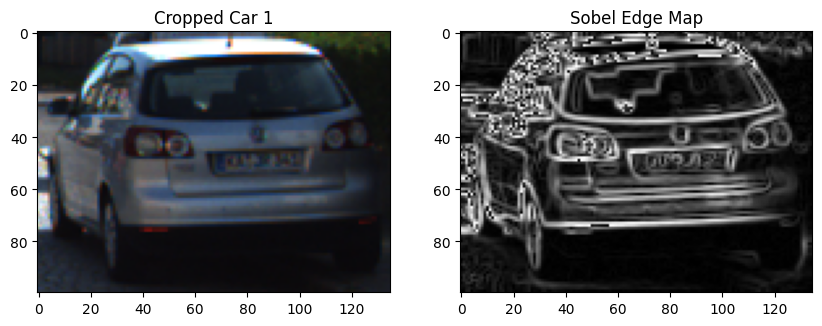

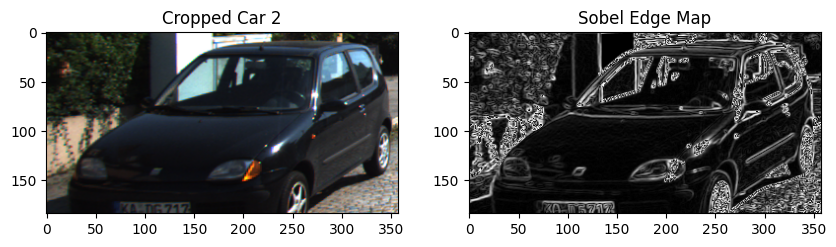

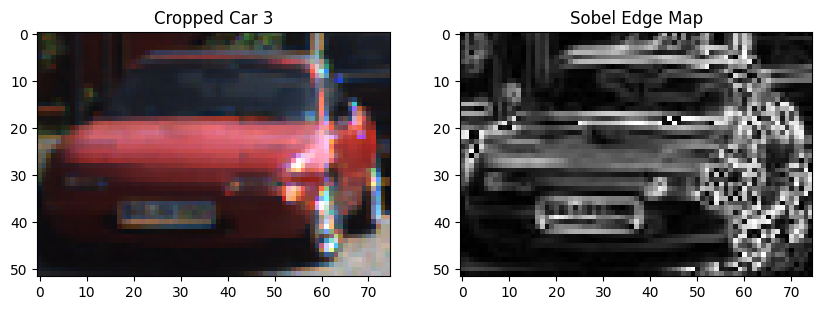

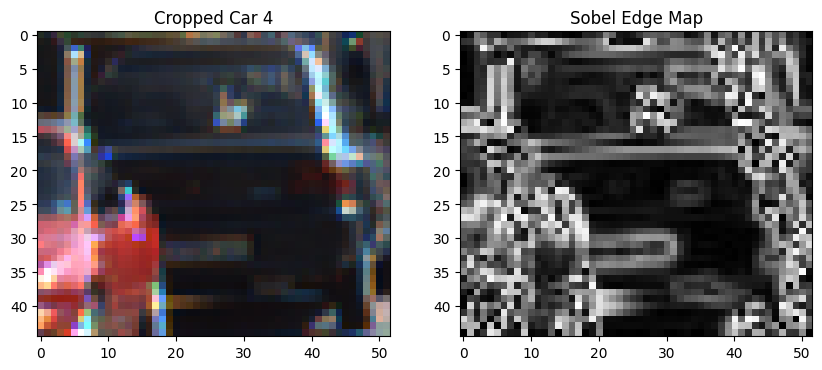

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import os


# Load your custom trained YOLO model
model = YOLO('/kaggle/input/kitti-yolo-model/best.pt')

# Run prediction on the image
results = model.predict(
    source='/kaggle/input/test-image/000075.png',
    save=True,
    save_txt=True,
    conf=0.4
)

# Load the original image using OpenCV for cropping
original_img = cv2.imread('/kaggle/input/test-image/000075.png')

# Get predictions
boxes = results[0].boxes

# Loop through all detected boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Bounding box coords
    
    # Crop the region of interest (car)
    roi = original_img[y1:y2, x1:x2]

    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter (both x and y)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Combine both directions
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = np.uint8(sobel_combined)

    # Display each cropped and edge-detected image
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped Car {i+1}')

    plt.subplot(1,2,2)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Sobel Edge Map')

    plt.show()


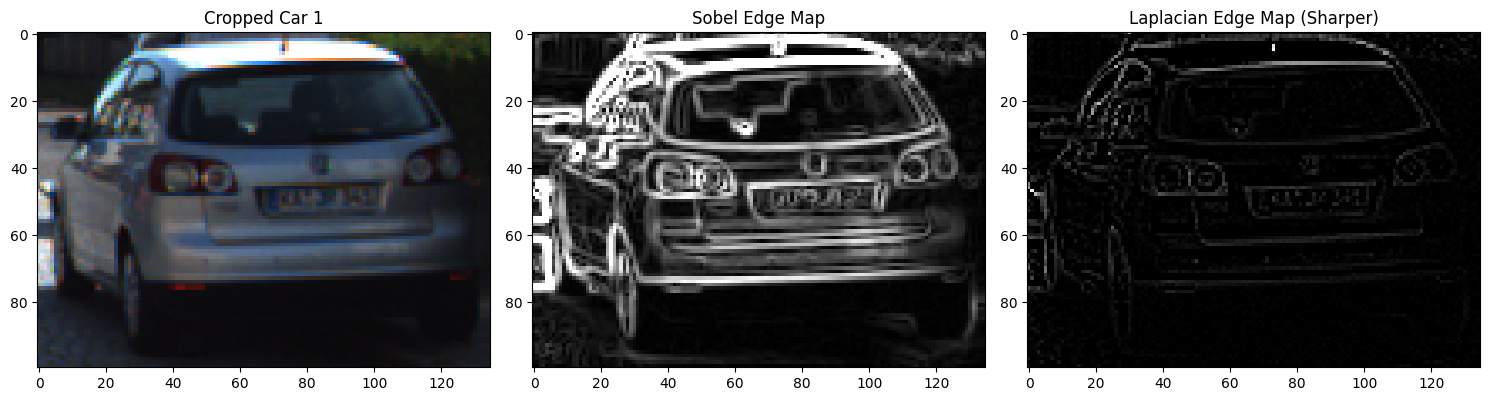

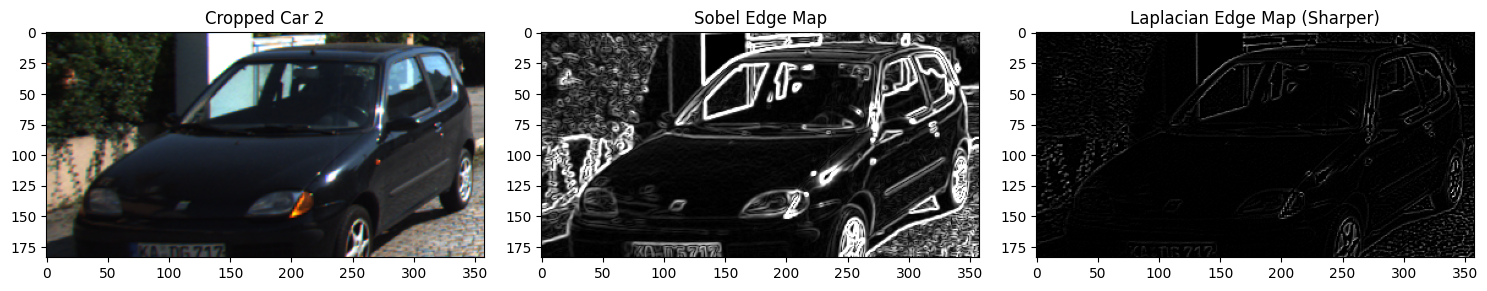

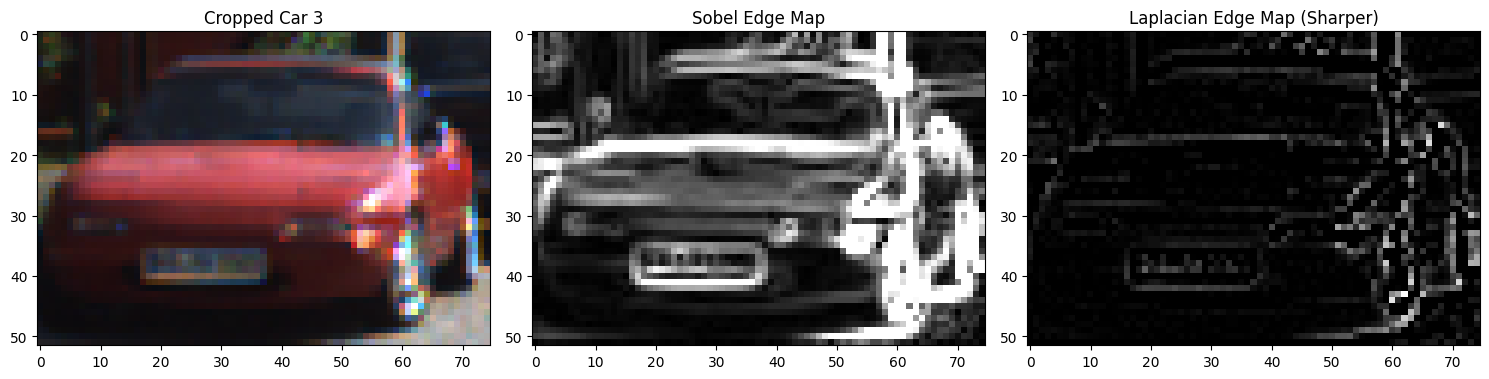

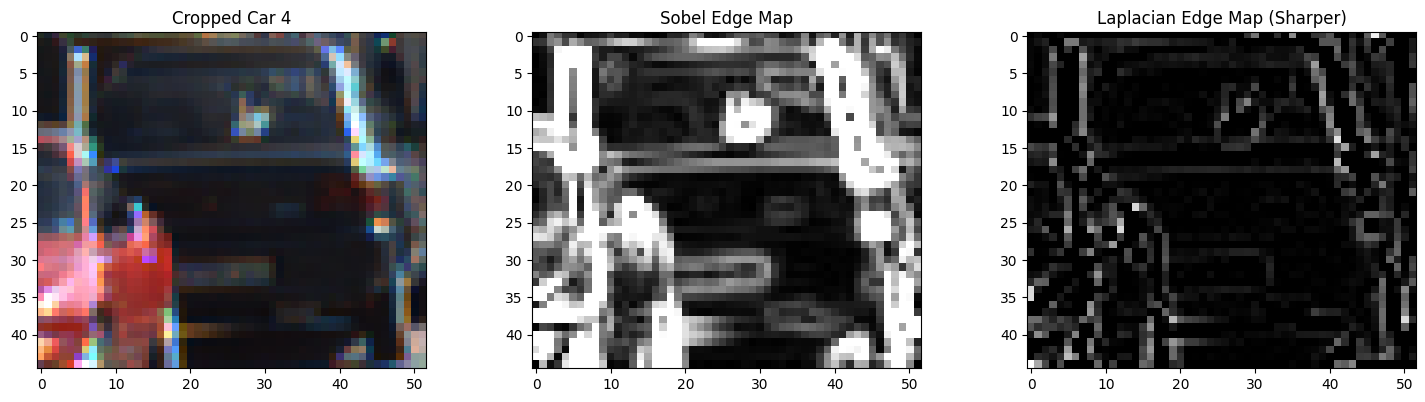

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reuse previous results and image
original_img = cv2.imread('/kaggle/input/test-image/000075.png')
boxes = results[0].boxes

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    roi = original_img[y1:y2, x1:x2]

    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Sobel (for comparison)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

    # Laplacian filter
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = np.uint8(np.clip(laplacian, 0, 255))

    # Display all three
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped Car {i+1}')

    plt.subplot(1, 3, 2)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Sobel Edge Map')

    plt.subplot(1, 3, 3)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian Edge Map (Sharper)')
    
    plt.tight_layout()
    plt.show()


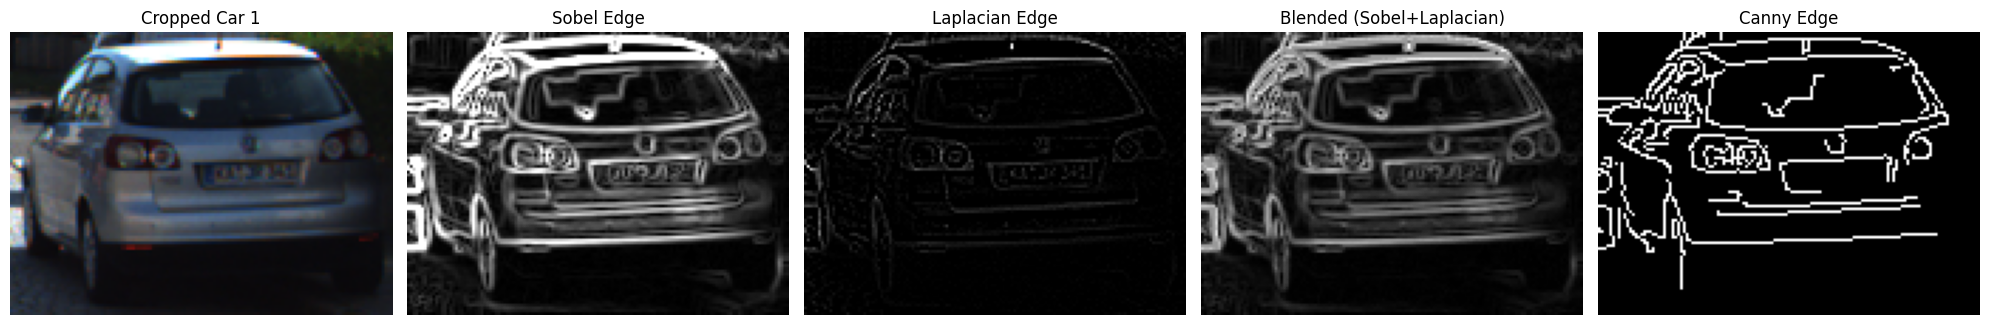

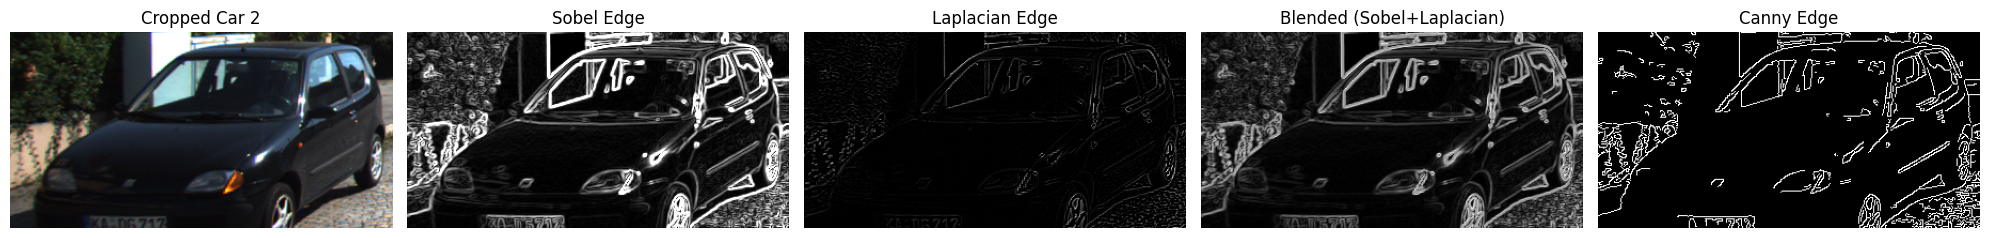

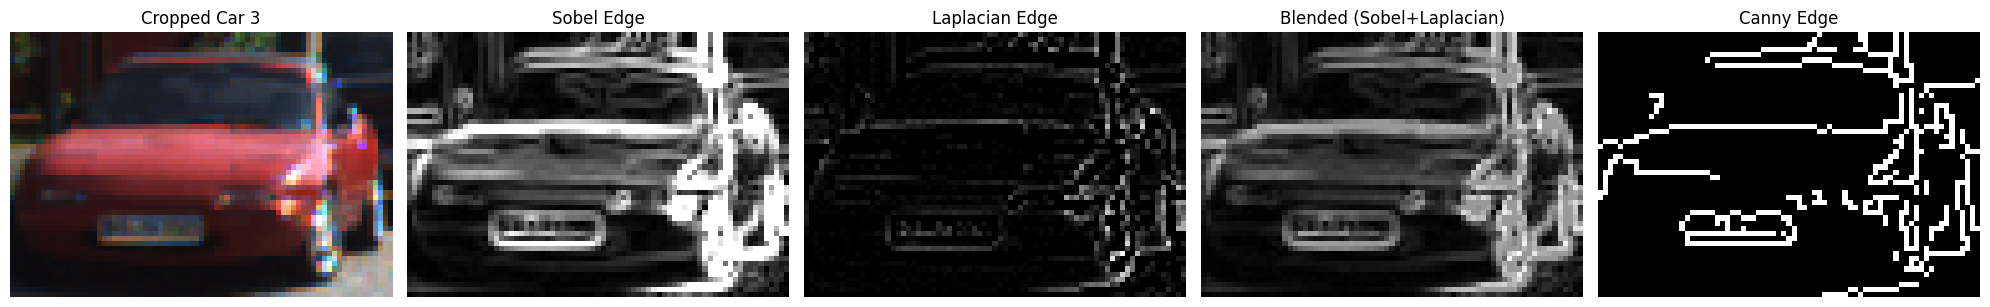

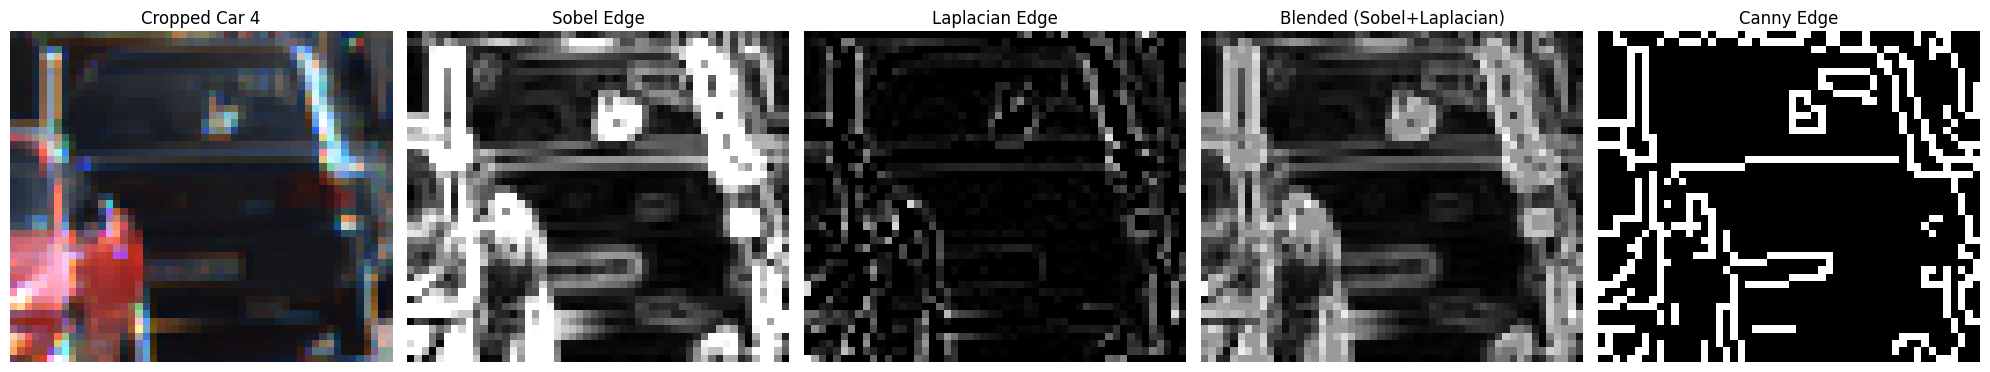

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original image again (optional safety)
original_img = cv2.imread('/kaggle/input/test-image/000075.png')
boxes = results[0].boxes

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    roi = original_img[y1:y2, x1:x2]

    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # --- Sobel Edge Detection ---
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobelx, sobely)
    sobel_combined = np.uint8(np.clip(sobel_combined, 0, 255))

    # --- Laplacian Edge Detection ---
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = np.uint8(np.clip(laplacian, 0, 255))

    # --- Blended Sobel + Laplacian ---
    blended = cv2.addWeighted(sobel_combined, 0.6, laplacian, 0.6, 0)

    # --- Canny Edge Detection ---
    canny = cv2.Canny(gray, threshold1=100, threshold2=200)

    # --- Show All Outputs ---
    plt.figure(figsize=(20, 4))

    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f'Cropped Car {i+1}')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Sobel Edge')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian Edge')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(blended, cmap='gray')
    plt.title('Blended (Sobel+Laplacian)')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Edge')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


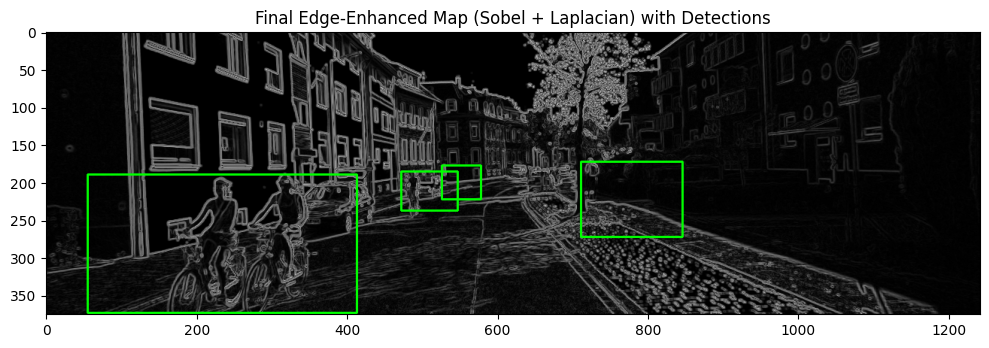

True

In [48]:
## Load image again (optional safety)
original_img = cv2.imread('/kaggle/input/kitti-yolo/Dataset/val/images/007280.png')
gray_full = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# --- Full Sobel ---
sobelx_full = cv2.Sobel(gray_full, cv2.CV_64F, 1, 0, ksize=3)
sobely_full = cv2.Sobel(gray_full, cv2.CV_64F, 0, 1, ksize=3)
sobel_full = cv2.magnitude(sobelx_full, sobely_full)
sobel_full = np.uint8(np.clip(sobel_full, 0, 255))

# --- Full Laplacian ---
laplacian_full = cv2.Laplacian(gray_full, cv2.CV_64F)
laplacian_full = np.uint8(np.clip(laplacian_full, 0, 255))

# --- Final Blended Map (Edge Enhanced Map) ---
edge_enhanced_map = cv2.addWeighted(sobel_full, 0.4, laplacian_full, 0.4, 0)

# --- Optional: Overlay bounding boxes on top for reference ---
output_image = cv2.cvtColor(edge_enhanced_map, cv2.COLOR_GRAY2BGR)  # convert for colored box drawing
boxes = results[0].boxes

for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    cv2.rectangle(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # green box

# --- Show Result ---
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Final Edge-Enhanced Map (Sobel + Laplacian) with Detections')
plt.axis()
plt.tight_layout()
plt.show()

cv2.imwrite('/kaggle/working/final_edge_map.png', output_image)
